In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# Display first 5 rows
print(df.head())

# Summary information
print(df.info())

# Basic statistics
print(df.describe(include='all'))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [13]:
# Check for missing values
print(df.isnull().sum())

# Drop columns with too many missing values
df = df.drop(columns=['deck'])

# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Drop rows with missing 'embarked'
df.dropna(subset=['embarked'], inplace=True)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\aarti\AppData\Local\Temp\ipykernel_15116\3602983510.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


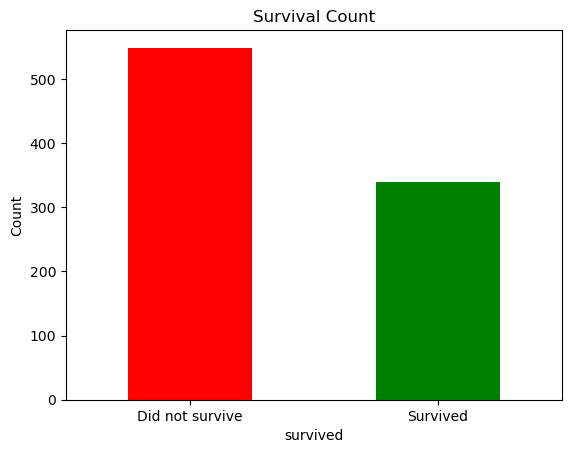

In [15]:
df['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xticks(ticks=[0,1], labels=['Did not survive', 'Survived'], rotation=0)
plt.ylabel('Count')
plt.show()

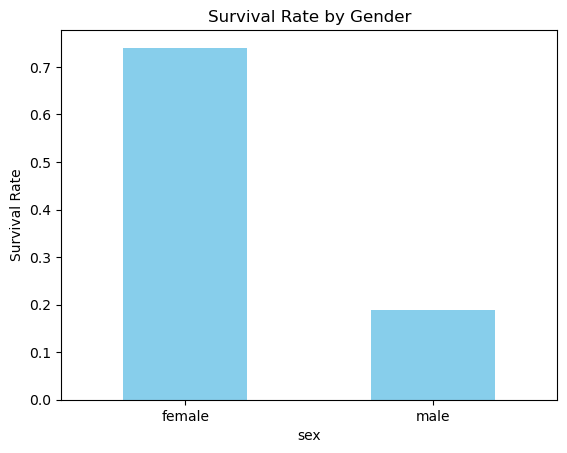

In [17]:
survival_by_gender = df.groupby('sex')['survived'].mean()
survival_by_gender.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

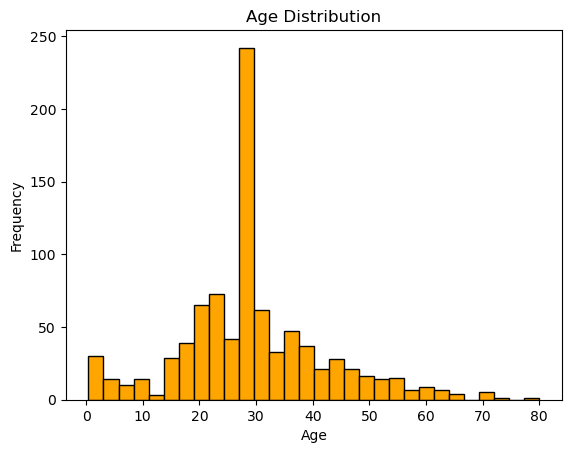

In [19]:
df['age'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

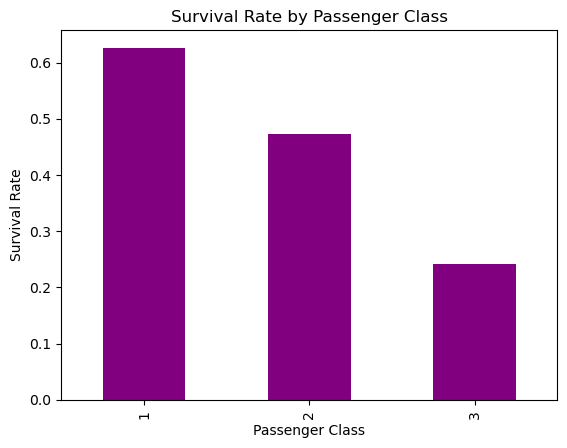

In [21]:
df.groupby('pclass')['survived'].mean().plot(kind='bar', color='purple')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()